# Task 1:  Predict Wine Quality For White Wine 

### Task 1 Comprises of:
#### Experiment 1 : Decision Tree Classifier
#### Experiment 2 : Decision. Tree Clasifier (GridSearch)
#### Experiment 3 : SVM (GridSearch)

### Wine Quality And WIne Type Classification

The wine quality data set is from UCI Machine Learning Respository. 

White Wine
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

Red Wine
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [3]:
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR, SVC
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score, f1_score, log_loss, r2_score, balanced_accuracy_score, average_precision_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import ShuffleSplit, cross_val_score, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [4]:
whiteWine=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
redWine=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')

### Exploratory Data Analysis

In [5]:
print('whiteWine :\n')
print( whiteWine.info())
print('redWine :\n')
print(redWine.info())

whiteWine :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
redWine :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 

From observation, there are less redWine samples compared to whiteWine samples.  

In [6]:
display(redWine.head(), whiteWine.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
#a function to simplify analysis of data

def dataDescribe(df):
    dfShape=df.shape
    dfInfo=df.info()
    dfTypes=df.dtypes #type of data
    dfCounts=df.apply(lambda x:x.count()) #number of sample instances
    dfNulls=df.apply(lambda x:x.isnull().sum())
    dfDistincts=df.apply(lambda x:x.unique().shape[0]) #number of distinct value for each column
    dfMax=df.apply(lambda x:x.max())
    dfMin=df.apply(lambda x:x.min())
    dfSkew=df.skew()
    dfKurtosis=df.kurt()
    
    cols=['types','count','null_entry', 'distict_value','max_value', 'min_value', 'skew','kurtosis']
    
    dfDescribe=pd.concat([dfTypes,dfCounts,dfNulls,dfDistincts,dfMax,dfMin,dfSkew,dfKurtosis],axis=1)
    
    dfDescribe.columns=cols
    
    print('Shape :', dfShape)
    print('Info :',dfInfo)
    return dfDescribe

#redWine.apply(lambda x:x.unique().shape[0])
#redWine.apply(lambda x:x.count())
#redWine.apply(lambda x:x.max())
#redWine.apply(lambda x:x.min())
#redWine.apply(lambda x:x.isnull().sum())

In [8]:
redWineDetails=dataDescribe(redWine)
display(redWineDetails)
whiteWineDetails=dataDescribe(whiteWine)
display(whiteWineDetails)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Shape : (1599, 12)
Info : None


,types,count,null_entry,distict_value,max_value,min_value,skew,kurtosis
fixed acidity,float64,1599,0,96,15.90000,4.60000,0.982751,1.132143
volatile acidity,float64,1599,0,143,1.58000,0.12000,0.671593,1.225542
citric acid,float64,1599,0,80,1.00000,0.00000,0.318337,-0.788998
residual sugar,float64,1599,0,91,15.50000,0.90000,4.540655,28.617595
chlorides,float64,1599,0,153,0.61100,0.01200,5.680347,41.715787
free sulfur dioxide,float64,1599,0,60,72.00000,1.00000,1.250567,2.023562
total sulfur dioxide,float64,1599,0,144,289.00000,6.00000,1.515531,3.809824
density,float64,1599,0,436,1.00369,0.99007,0.071288,0.934079
pH,float64,1599,0,89,4.01000,2.74000,0.193683,0.806943
sulphates,float64,1599,0,96,2.00000,0.33000,2.428672,11.720251


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
Shape : (4898, 12)
Info : None


,types,count,null_entry,distict_value,max_value,min_value,skew,kurtosis
fixed acidity,float64,4898,0,68,14.20000,3.80000,0.647751,2.172178
volatile acidity,float64,4898,0,125,1.10000,0.08000,1.576980,5.091626
citric acid,float64,4898,0,87,1.66000,0.00000,1.281920,6.174901
residual sugar,float64,4898,0,310,65.80000,0.60000,1.077094,3.469820
chlorides,float64,4898,0,160,0.34600,0.00900,5.023331,37.564600
free sulfur dioxide,float64,4898,0,132,289.00000,2.00000,1.406745,11.466342
total sulfur dioxide,float64,4898,0,251,440.00000,9.00000,0.390710,0.571853
density,float64,4898,0,890,1.03898,0.98711,0.977773,9.793807
pH,float64,4898,0,103,3.82000,2.72000,0.457783,0.530775
sulphates,float64,4898,0,79,1.08000,0.22000,0.977194,1.590930


#### Both red wine and white wine dataset has no missing information. 

(acceptable range for being normally distributed for kurtosis is (-2,2), and for skewness is (-1,1))

* The following attributes of the White Wine are highly positve skewed:
  * volatile acidity, citric acid, chlorides, free sulphur dioxide, quality
* The following attributes of Red Wine are highly positve skewed:
  * residual sugar, chlorides, free sulphur dioxide, total sulphur dioxide, sulphates

The following attributes of White Wine have high kurtosis:
  * fixed acidity, volatile acidity, citric acid, residual sugar, cholrides, free sulphur dioxide, density
 
The following attributes of Red Wine havd high kurtosis:
  * residual sugar, chlorides, total sulphur dioxide, sulphates

### Visualizing The Data

In [9]:
def plotChart(redWine,whiteWine,chemical,xLabelRed,xLabelWhite,yLabel,title):
        fig, ax = plt.subplots(1, 2)

        ax[0].hist(redWine[chemical], 10, facecolor='red')


        ax[1].hist(whiteWine[chemical],10, facecolor='white', ec="black", lw=1)


        #ax[0].set_ylim([0, max(redWine[chemical].value_counts().max(),whiteWine[chemical].value_counts().max())])
        fig.subplots_adjust(left=0, right=1, bottom=0, top=0.8, hspace=0.05, wspace=1)
        ax[0].set_xlabel(xLabelRed)
        ax[0].set_ylabel(yLabel)
        ax[1].set_xlabel(xLabelWhite)
        ax[1].set_ylabel(yLabel)
        fig.suptitle(title)

        plt.show()


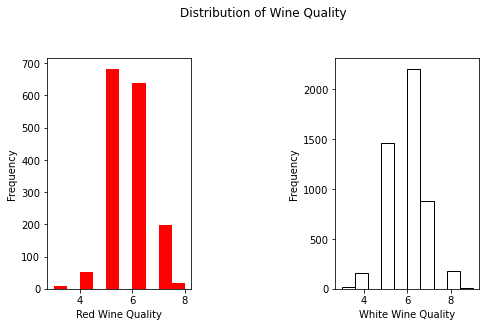

In [10]:
chemical='quality'
xLabelRed="Red Wine Quality"
xLabelWhite="White Wine Quality"
yLabel="Frequency"
title="Distribution of Wine Quality"

plotChart(redWine, whiteWine,chemical,xLabelRed,xLabelWhite,yLabel,title )



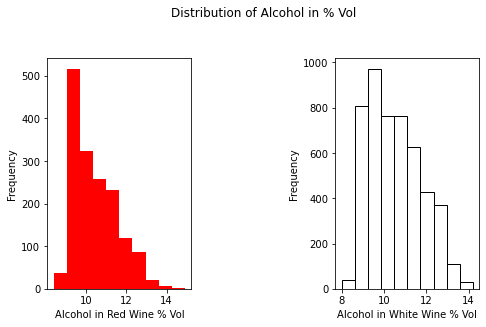

In [11]:
#Understanding Alcohol 

chemical='alcohol'
xLabelRed="Alcohol in Red Wine % Vol"
xLabelWhite="Alcohol in White Wine % Vol"
yLabel="Frequency"
title="Distribution of Alcohol in % Vol"

plotChart(redWine, whiteWine,chemical,xLabelRed,xLabelWhite,yLabel,title )


As can be observed in the chart above, alcohol levels for both red and white wine are mostly around 9-10%. Very few wines are above 14% in alcohol. 

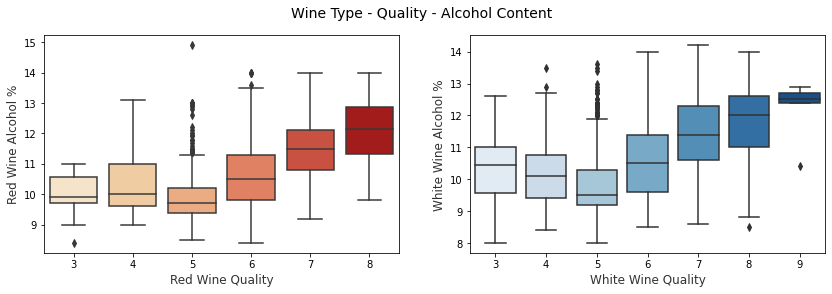

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x='quality', y='alcohol',ax=ax1, data=redWine, palette='OrRd')


ax1.set_xlabel("Red Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Red Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x='quality', y='alcohol', data=whiteWine, ax=ax2, palette='Blues')

ax2.set_xlabel("White Wine Quality",size = 12,alpha=0.8)
ax2.set_ylabel("White Wine Alcohol %",size = 12,alpha=0.8)
plt.show()


From the chart above, it can be obseved that mean alcohol levels are higher for better wine quality rating for both red or white wine. However for average wine quality, outliers in alcohol level can be observed. Perhaps it is harder to discern average wine based on alcohol level.  

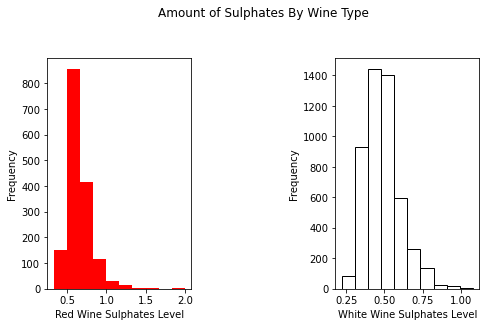

In [13]:
chemical='sulphates'
xLabelRed="Red Wine Sulphates Level"
xLabelWhite="White Wine Sulphates Level"
yLabel="Frequency"
title="Amount of Sulphates By Wine Type"

plotChart(redWine, whiteWine,chemical, xLabelRed,xLabelWhite,yLabel,title )




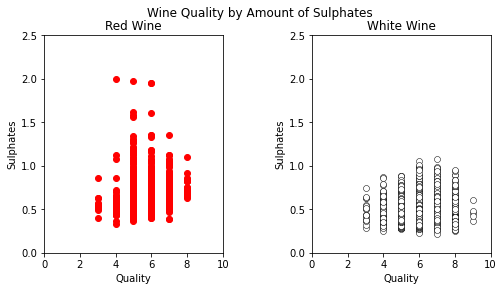

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(redWine['quality'], redWine["sulphates"], color="red")
ax[1].scatter(whiteWine['quality'], whiteWine['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

Suplhates are related to the fermentation process of wine and affects the aroma and flavor. However, sulphates has been reported to cause headaches in females more often than males. 

As can be observed from the charts, red wine generally has higher levels of sulphates compared to white wine. 

From the scatter plot, higher quality red and white wines have lower levels of sulphates. 

In [15]:
subset_attributes = redWine.columns
print(subset_attributes)
rs = round(redWine.loc[:, subset_attributes].describe(),2)
#print(rs)
ws = round(whiteWine.loc[:, subset_attributes].describe(),2)
pd.concat([rs, ws], axis=0, keys=['Red Wine Statistics', 'White Wine Statistics']).T

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


Red Wine Statistics                                    \
                                   count   mean    std   min    25%    50%   
fixed acidity                     1599.0   8.32   1.74  4.60   7.10   7.90   
volatile acidity                  1599.0   0.53   0.18  0.12   0.39   0.52   
citric acid                       1599.0   0.27   0.19  0.00   0.09   0.26   
residual sugar                    1599.0   2.54   1.41  0.90   1.90   2.20   
chlorides                         1599.0   0.09   0.05  0.01   0.07   0.08   
free sulfur dioxide               1599.0  15.87  10.46  1.00   7.00  14.00   
total sulfur dioxide              1599.0  46.47  32.90  6.00  22.00  38.00   
density                           1599.0   1.00   0.00  0.99   1.00   1.00   
pH                                1599.0   3.31   0.15  2.74   3.21   3.31   
sulphates                         1599.0   0.66   0.17  0.33   0.55   0.62   
alcohol                           1599.0  10.42   1.07  8.40   9.50  10.20   
quality                           1599.0   5.64   0.81  3.00   5.00   6.00   

                                    White Wine Statistics                 \
                        75%     max                 count    mean    std   
fixed acidity          9.20   15.90                4898.0    6.85   0.84   
volatile acidity       0.64    1.58                4898.0    0.28   0.10   
citric acid            0.42    1.00                4898.0    0.33   0.12   
residual sugar         2.60   15.50                4898.0    6.39   5.07   
chlorides              0.09    0.61                4898.0    0.05   0.02   
free sulfur dioxide   21.00   72.00                4898.0   35.31  17.01   
total sulfur dioxide  62.00  289.00                4898.0  138.36  42.50   
density                1.00    1.00                4898.0    0.99   0.00   
pH                     3.40    4.01                4898.0    3.19   0.15   
sulphates              0.73    2.00                4898.0    0.49   0.11   
alcohol               11.10   14.90                4898.0   10.51   1.23   
quality                6.00    8.00                4898.0    5.88   0.89   

                                                            
                       min     25%     50%     75%     max  
fixed acidity         3.80    6.30    6.80    7.30   14.20  
volatile acidity      0.08    0.21    0.26    0.32    1.10  
citric acid           0.00    0.27    0.32    0.39    1.66  
residual sugar        0.60    1.70    5.20    9.90   65.80  
chlorides             0.01    0.04    0.04    0.05    0.35  
free sulfur dioxide   2.00   23.00   34.00   46.00  289.00  
total sulfur dioxide  9.00  108.00  134.00  167.00  440.00  
density               0.99    0.99    0.99    1.00    1.04  
pH                    2.72    3.09    3.18    3.28    3.82  
sulphates             0.22    0.41    0.47    0.55    1.08  
alcohol               8.00    9.50   10.40   11.40   14.20  
quality               3.00    5.00    6.00    6.00    9.00

#### Comments From Descriptive Statistics Above:
* Red wine has highter mean values of fixed acidity, volatile acidity and sulphates compared to white wine.
* White wine has higher mean values of residual sugar, free sulphur dioxide, total sulphur dioxide than red wine.
* Alcohol content does not give much variation to distiguish between White and Red Wine. 


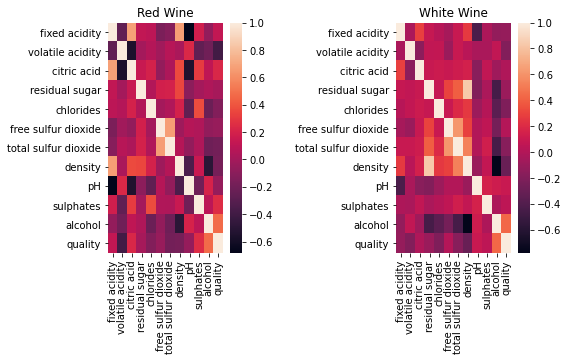

In [16]:
fig,ax=plt.subplots(1,2)


sns.heatmap(redWine.corr(), xticklabels=redWine.corr().columns.values, yticklabels=redWine.corr().columns.values, ax=ax[0])
ax[0].set_title('Red Wine')
sns.heatmap(whiteWine.corr(), xticklabels=whiteWine.corr().columns.values, yticklabels=whiteWine.corr().columns.values, ax=ax[1])
ax[1].set_title('White Wine')
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.8, hspace=0.05, wspace=1)

plt.show()

#### Comments on Correlations 
* For White Wine, density has relatively high positive correlation with residual sugar, and high negative correlation with alcohol. 
* For Red Wine, alcohol has high positive correlation with quality, and strong negative correlation between density and alcohol level. 
* Generally, free sulphur dioxide and total sulphur dioxide tend to positively correlate. Volatile acidity and citric acid tend to negatively correlate. 

From wine literature, density is generally used as measure of conversion of sugar to alcohol.  So in the case of white wine, the high positive correlation between density and residual sugar and negative correlation with alcohol makes sense as it reflects more conversion of sugar to alcohol. 


### Preprocess Data

This project will be predicting: 
* whether wine sample is red or white wine
* Quality of wine sample

The plan also include trying functional api with two inputs and two outputs for predicting both wine quality and wine type. 

In [17]:
redWine['type']=1
whiteWine['type']=0
wines=redWine.append(whiteWine, ignore_index=True)

In [18]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [19]:
#A better approach is to group quality score into bands as low, average, good. 
#3,4- low. 5,6 - average, 7,8,9 good
# represent '0' as low, '1' as average, '2' as good

wines['quality_class']=wines.quality.apply(lambda x: 0 if x<5 else 2 if x>6 else 1) 
wines.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,1


In [20]:
wines.quality_class.value_counts().sort_index()

0     246
1    4974
2    1277
Name: quality_class, dtype: int64

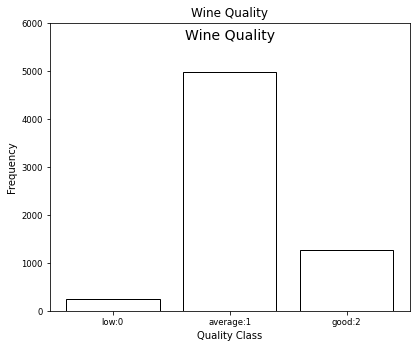

In [21]:
fig=plt.figure(figsize=(5,4))
ax= fig.add_axes([0,0,1,1])

title = fig.suptitle("Wine Quality", fontsize=14)
ax.set_title("Wine Quality")
ax.set_xlabel("Quality Class")
ax.set_ylabel("Frequency") 

w_q = wines.quality_class.value_counts().sort_index()
w_q = (list(w_q.index), list(w_q.values))
ax.set_ylim([0, 6000])
ax.tick_params(axis='both', which='major', labelsize=8.5)
ax.bar(list(range(len(w_q[0]))), w_q[1], color='white', 
               edgecolor='black', linewidth=1, tick_label =['low:0','average:1','good:2'])

plt.show()

In [22]:
X=wines.drop(['quality','quality_class'], axis=1)
y=wines['quality_class']

In [23]:
display(X.head(), y.head())


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


0    1
1    1
2    1
3    1
4    1
Name: quality_class, dtype: int64

y_le=y.apply(lambda x: 0 if x=='low' else 2 if x=='good' else 1) 
y_le

In [24]:
correlations = X.corrwith(y) 
correlations.sort_values(inplace=True)
correlations

density                -0.246116
volatile acidity       -0.194906
chlorides              -0.154945
type                   -0.077917
fixed acidity          -0.052052
residual sugar         -0.035250
total sulfur dioxide   -0.029793
pH                      0.016064
sulphates               0.043719
free sulfur dioxide     0.048382
citric acid             0.073082
alcohol                 0.360580
dtype: float64

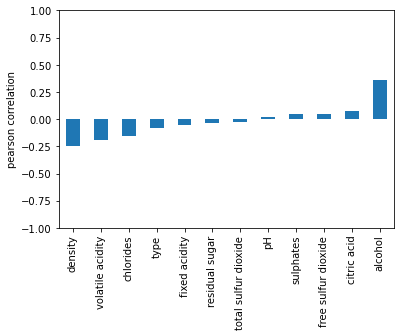

In [25]:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
display(X_train.shape, X_test.shape,y_train.shape, y_test.shape)

(5197, 12)

(1300, 12)

(5197,)

(1300,)

## Experiment 1: Decision Tree Classifier (Default)

### Decision Trees Classifier

#### Decision Tree without constraints other then max depth=300.
* we first fit a decision tree without much constraint to limit its growth 
* objective is to determine how many nodes there are and what is the depth of the decision tree


* decision also does not require scaling of features. 

<AxesSubplot:xlabel='quality_class', ylabel='count'>

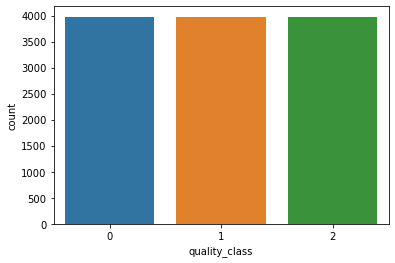

In [28]:
from imblearn.over_sampling import SMOTE 
#import imbalanced-learn python library.
oversample=SMOTE(random_state=42)
X_smote_train,y_smote_train=oversample.fit_resample(X_train,y_train)

sns.countplot(x=y_smote_train)

In [29]:
%%time
from sklearn.tree import DecisionTreeClassifier

clf_1a = DecisionTreeClassifier(random_state=42,max_depth=300)
clf_1a = clf_1a.fit(X_smote_train, y_smote_train)

CPU times: user 105 ms, sys: 1.64 ms, total: 106 ms
Wall time: 105 ms


In [30]:
clf_1a.tree_.node_count, clf_1a.tree_.max_depth

(2703, 30)

In [31]:
clf_1a.feature_importances_

array([0.06660854, 0.10870225, 0.05103212, 0.08176512, 0.07220784,
       0.11366559, 0.08551973, 0.05344178, 0.0564579 , 0.09867242,
       0.1890152 , 0.02291151])

In [32]:
feature_cols=X.columns

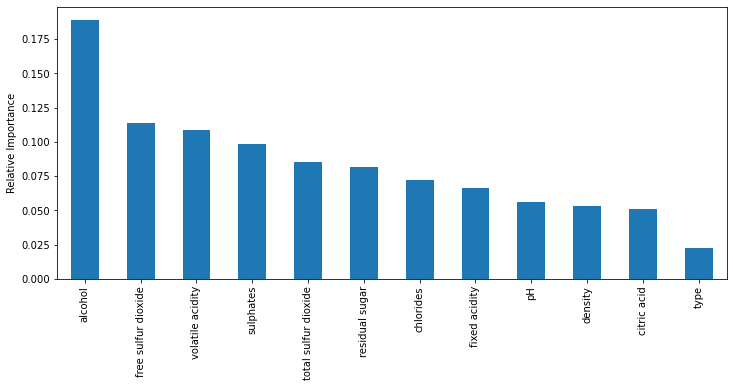

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

feature_imp = pd.Series(clf_1a.feature_importances_, index=feature_cols).sort_values(ascending=False)
fig = plt.figure(figsize=(12,5))
ax = feature_imp.plot(kind='bar')
ax.set(ylabel='Relative Importance');

as can be observed from the chart, alcohol has the highest relative importance in determining wine quality.

We have previously review written literature by wine reviewers and analyse the dataset according to sulphates and alcohol level. And the conclusion from decision tree seems to agree with the preliminary data analysis.  

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred).round(2),
                      'precision': precision_score(y_true, y_pred,average=None).round(2),
                      'recall': recall_score(y_true, y_pred,average=None).round(2),
                      'f1': f1_score(y_true, y_pred,average=None).round(2)},
                      name=label)

In [47]:
%%time
y_train_pred = clf_1a.predict(X_smote_train)
y_test_pred = clf_1a.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_smote_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred, 'test')],
                                   axis=1)

train_test_full_error

CPU times: user 19.1 ms, sys: 1.17 ms, total: 20.2 ms
Wall time: 18.9 ms


,train,test
accuracy,1,0.76
precision,"[1.0, 1.0, 1.0]","[0.16, 0.9, 0.57]"
recall,"[1.0, 1.0, 1.0]","[0.31, 0.79, 0.73]"
f1,"[1.0, 1.0, 1.0]","[0.21, 0.84, 0.64]"


In [36]:
from sklearn.metrics import classification_report, confusion_matrix

Confusion Matrxi Of Training Set:


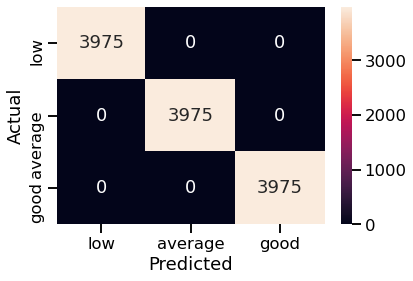

In [37]:
def plot_consfusionmatrix(actual,predict):
    cm = confusion_matrix(actual, predict)
    sns.set_context('talk')
    ax = sns.heatmap(cm, annot=True, fmt='d')
    labels = ['low', 'average','good']
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    #print(cm)

print('Confusion Matrxi Of Training Set:') 
plot_consfusionmatrix(y_smote_train,y_train_pred)    

In [38]:
print(classification_report(y_smote_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3975
           1       1.00      1.00      1.00      3975
           2       1.00      1.00      1.00      3975

    accuracy                           1.00     11925
   macro avg       1.00      1.00      1.00     11925
weighted avg       1.00      1.00      1.00     11925



Confusion Matrix of Test Set:


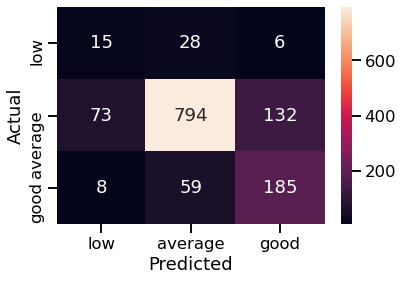

In [39]:
print('Confusion Matrix of Test Set:')
plot_consfusionmatrix(y_test,y_test_pred)

In [40]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.16      0.31      0.21        49
           1       0.90      0.79      0.84       999
           2       0.57      0.73      0.64       252

    accuracy                           0.76      1300
   macro avg       0.54      0.61      0.57      1300
weighted avg       0.81      0.76      0.78      1300



## Experiment 2: Decision Tree Classifier (GridSearchCV)

### The following steps will attemp to implment grid search to find the best hyperparameters.

In [41]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1, clf_1a.tree_.max_depth+1, 2),
              'max_features': range(1, X_smote_train.shape[1]+1)}

gr_dt_clf = GridSearchCV(DecisionTreeClassifier(random_state=42),
                         param_grid=param_grid,
                         scoring='accuracy',
                         n_jobs=-1)

gr_dt_clf = gr_dt_clf.fit(X_smote_train, y_smote_train)

CPU times: user 1.6 s, sys: 240 ms, total: 1.84 s
Wall time: 7.12 s



The wall time means that a clock hanging on a wall outside of the computer would measure 7.54 s from the time the code was submitted to the CPU to the time when the process completed.

User time and sys time both refer to time taken by the CPU to actually work on the code. 

The CPU time dedicated to our code is only a fraction of the wall time as the CPU swaps its attention from our code to other processes that are running on the system.

User time is the amount of CPU time taken outside of the kernel. 

Sys time is the amount of time taken inside of the kernel. 

The actual CPU time used by the process is user time + sys time. 

In [42]:
gr_dt_clf.best_estimator_.tree_.node_count, gr_dt_clf.best_estimator_.tree_.max_depth

(2485, 19)

In [43]:
gr_dt_clf.best_params_

{'max_depth': 19, 'max_features': 10}

<b> The number of node count is 2485.

The max depth is 19

Max features is 10. (The number of features to consider when looking for the best split)

In [44]:
y_train_pred = gr_dt_clf.predict(X_smote_train)
#y_train_pred_prob = gr_dt_clf.predict_proba(X_smote_train)
y_test_pred = gr_dt_clf.predict(X_test)
#y_test_pred_prob = gr_dt_clf.predict_proba(X_test)

train_test_error = pd.concat([measure_error(y_smote_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_error

,train,test
accuracy,0.99,0.75
precision,"[1.0, 1.0, 0.98]","[0.16, 0.9, 0.55]"
recall,"[1.0, 0.98, 1.0]","[0.35, 0.77, 0.74]"
f1,"[1.0, 0.99, 0.99]","[0.22, 0.83, 0.63]"


Confusion Matrix of GridSearchCV Train Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3975
           1       1.00      0.98      0.99      3975
           2       0.98      1.00      0.99      3975

    accuracy                           0.99     11925
   macro avg       0.99      0.99      0.99     11925
weighted avg       0.99      0.99      0.99     11925



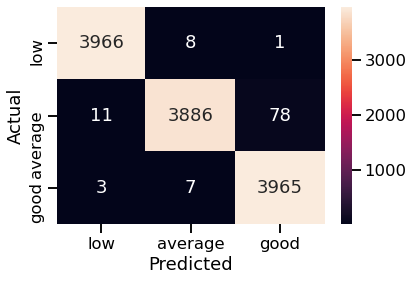

In [45]:
print('Confusion Matrix of GridSearchCV Train Set:')
plot_consfusionmatrix(y_smote_train,y_train_pred)
print(classification_report(y_smote_train, y_train_pred))

Confusion Matrix of GridSearchCV Test Set:
              precision    recall  f1-score   support

           0       0.16      0.35      0.22        49
           1       0.90      0.77      0.83       999
           2       0.55      0.74      0.63       252

    accuracy                           0.75      1300
   macro avg       0.54      0.62      0.56      1300
weighted avg       0.81      0.75      0.77      1300



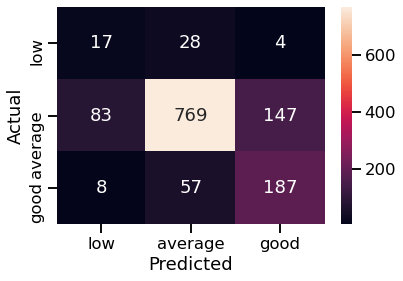

In [46]:
print('Confusion Matrix of GridSearchCV Test Set:')
plot_consfusionmatrix(y_test,y_test_pred)
print(classification_report(y_test, y_test_pred))

## Experiment 3: SVM (GridSearch)

### Using Nonlinear Support Vector Machine Model 

SVMsoften work effectively with balanced datasets, they could produce suboptimal results with imbalanced datasets.

So we will be using the standard scaled, SMOTE transform dataset.

**Scaling of data is required:**

>SVM constructs a hyperplane such that it has the largest distance to the nearest data points (called support vectors). If the dimensions have different ranges, the dimension with much bigger range of values influences the distance more than other dimensions. So its necessary to scale the features such that all the features have similar influence when calculating the distance to construct a hyperplane.

In [240]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_smote_train)
X_train_scaled = scaler.transform(X_smote_train)

X_test_scaled = scaler.transform(X_test)

#essentially X_train_scaled is the outcome of SMOTE and StandardScaling.
#X_test_scaled is just StandardScaled. No SMOTE. 


#after this operation, training set is: X_train_scaled, y_smote_train
#test set will X_test_scaled, y_test

In [237]:
from sklearn.svm import SVC

In [238]:
display(X_smote_train.shape, y_train_enc.shape, X_test.shape)

(11925, 12)

(11925,)

(1300, 12)

In [281]:
%%time

gamma1, gamma2 = 0.1, 50
C1, C2 = 0.1, 10000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

for gamma, C in hyperparams:
    GSVC = SVC(kernel="rbf", gamma=gamma, C=C) 
    
    GSVC.fit(X_train_scaled, y_smote_train)
    GSVC_y_train_pred = GSVC.predict(X_train_scaled)
   
    GSVC_y_test_pred = GSVC.predict(X_test_scaled)
    
    train_test_full_error = pd.concat([measure_error(y_smote_train, GSVC_y_train_pred, 'train'),
                                       measure_error(y_test, GSVC_y_test_pred, 'test')],
                                       axis=1)
    print("gamma =", gamma)
    print("C =", C)
    print(train_test_full_error)
    #print(confusion_matrix(y_test_enc, GSVC_y_test_pred))
    #print(classification_report(y_test_enc, GSVC_y_test_pred))
    #print()

gamma = 0.1
C = 0.1
                        train                test
accuracy                 0.75                0.63
precision  [0.82, 0.67, 0.75]   [0.13, 0.9, 0.45]
recall     [0.77, 0.63, 0.85]   [0.51, 0.6, 0.77]
f1          [0.8, 0.65, 0.79]  [0.21, 0.72, 0.57]
gamma = 0.1
C = 10000
                       train                test
accuracy                   1                0.78
precision   [1.0, 1.0, 0.99]   [0.19, 0.88, 0.6]
recall      [1.0, 0.99, 1.0]  [0.33, 0.83, 0.65]
f1         [1.0, 0.99, 0.99]  [0.24, 0.85, 0.63]


/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


gamma = 50
C = 0.1
                        train               test
accuracy                 0.37               0.78
precision    [1.0, 0.35, 1.0]   [0.0, 0.77, 1.0]
recall      [0.04, 1.0, 0.07]   [0.0, 1.0, 0.04]
f1         [0.08, 0.51, 0.12]  [0.0, 0.87, 0.08]
gamma = 50
C = 10000
                     train                test
accuracy                 1                0.84
precision  [1.0, 1.0, 1.0]  [0.83, 0.83, 0.99]
recall     [1.0, 1.0, 1.0]    [0.1, 1.0, 0.35]
f1         [1.0, 1.0, 1.0]  [0.18, 0.91, 0.52]
CPU times: user 1min 17s, sys: 401 ms, total: 1min 18s
Wall time: 1min 18s


In [287]:

print(GSVC)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 4.77 µs
SVC(C=10000, gamma=50)


In [268]:
GSVC.get_params()

{'C': 10000,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 50,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Compare between two classifiers

In [276]:

def compare_accuracy(classifiers,labels):
    for clf, label in zip(classifiers,labels):        

        scores = cross_val_score(clf, X_smote_train, y_smote_train, cv=5, scoring='accuracy')
        print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(),label))

clf=DecisionTreeClassifier(**gr_dt_clf.best_params_,random_state=42)

cross_val_score(clf, X_smote_train, y_smote_train, cv=5, scoring='accuracy')

clf=SVC(**GSVC.get_params())
cross_val_score(clf, X_smote_train, y_smote_train, cv=5, scoring='accuracy')

In [282]:
%%time

clf1=DecisionTreeClassifier(**gr_dt_clf.best_params_,random_state=42)
clf2=SVC(**GSVC.get_params())

compare_accuracy([clf1,clf2],['DecisionTree','SVM'])


Accuracy: 0.85 (+/- 0.02) [DecisionTree]
Accuracy: 0.62 (+/- 0.03) [SVM]
CPU times: user 14.3 s, sys: 184 ms, total: 14.5 s
Wall time: 14.5 s
Accuracy: 0.85 (+/- 0.02) [DecisionTree]
Accuracy: 0.62 (+/- 0.03) [SVM]
CPU times: user 14.3 s, sys: 173 ms, total: 14.5 s
Wall time: 14.5 s
Accuracy: 0.85 (+/- 0.02) [DecisionTree]
Accuracy: 0.62 (+/- 0.03) [SVM]
CPU times: user 14.5 s, sys: 178 ms, total: 14.7 s
Wall time: 14.7 s
Accuracy: 0.85 (+/- 0.02) [DecisionTree]
Accuracy: 0.62 (+/- 0.03) [SVM]
CPU times: user 14.4 s, sys: 180 ms, total: 14.6 s
Wall time: 14.6 s
Accuracy: 0.85 (+/- 0.02) [DecisionTree]
Accuracy: 0.62 (+/- 0.03) [SVM]
CPU times: user 14.4 s, sys: 171 ms, total: 14.5 s
Wall time: 14.5 s
Accuracy: 0.85 (+/- 0.02) [DecisionTree]
Accuracy: 0.62 (+/- 0.03) [SVM]
CPU times: user 15.6 s, sys: 216 ms, total: 15.8 s
Wall time: 16 s
Accuracy: 0.85 (+/- 0.02) [DecisionTree]
Accuracy: 0.62 (+/- 0.03) [SVM]
CPU times: user 14.6 s, sys: 183 ms, total: 14.7 s
Wall time: 14.8 s
Accuracy